# 1. Regressive Tennis T-Test

Use a linear regression and statsmodels to run a t-test on whether Federer scores more points than his opponents in the `tennis.csv` dataset.

Give a one-paragraph interpretation of the coefficient, and the meaning of the p-value. 

Also answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

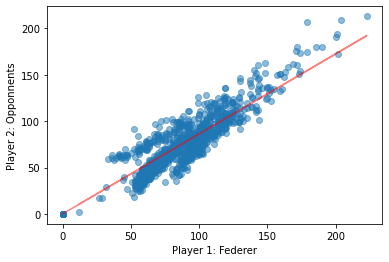

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     player2 total points won   R-squared (uncentered):                   0.969
Model:                                  OLS   Adj. R-squared (uncentered):              0.969
Method:                       Least Squares   F-statistic:                          3.670e+04
Date:                      Tue, 19 Jan 2021   Prob (F-statistic):                        0.00
Time:                              22:31:07   Log-Likelihood:                         -4710.2
No. Observations:                      1179   AIC:                                      9422.
Df Residuals:                          1178   BIC:                                      9427.
Df Model:                                 1                                                  
Covariance Type:                  nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
player1 total points won     0.8618      0.004    191.569      0.000       0.853       0.871
==============================================================================
Omnibus:                       93.438   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.040
Skew:                           0.720   Prob(JB):                     1.05e-25
Kurtosis:                       3.519   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2]:
t = pd.read_csv('data/tennis.csv')
t=t.sort_values(by='player1 total points won')
t_x1 =t['player1 total points won'].fillna(0)
t_y1 =t['player2 total points won'].fillna(0)

#t_x1 = sm.add_constant(t_x1)
t_model = sm.OLS(t_y1,t_x1).fit()
t_prediction = t_model.predict(t_x1)

t_fig, t_ax = plt.subplots()
t_ax.plot(t_x1,t_prediction,alpha=0.5,color='r')
t_ax.scatter(t_x1,t_y1,alpha=0.5)
plt.xlabel("Player 1: Federer")
plt.ylabel("Player 2: Opponnents")
plt.show()
t_model.summary()

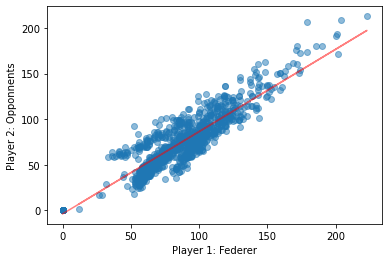

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     player2 total points won   R-squared:                       0.880
Model:                                  OLS   Adj. R-squared:                  0.880
Method:                       Least Squares   F-statistic:                     8619.
Date:                      Tue, 19 Jan 2021   Prob (F-statistic):               0.00
Time:                              22:31:07   Log-Likelihood:                -4699.0
No. Observations:                      1179   AIC:                             9402.
Df Residuals:                          1177   BIC:                             9412.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -3.9388      0.828     -4.756      0.000      -5.564      -2.314
player1 total points won     0.9030      0.010     92.836      0.000       0.884       0.922
==============================================================================
Omnibus:                       72.475   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.996
Skew:                           0.622   Prob(JB):                     3.49e-19
Kurtosis:                       3.430   Cond. No.                         186.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
t_x2 =t['player1 total points won'].fillna(0)
t_y2 =t['player2 total points won'].fillna(0)

t_x2 = sm.add_constant(t_x2)
t_model2 = sm.OLS(t_y2,t_x2).fit()
t_prediction2 = t_model2.predict(t_x2)

t2_fig, t2_ax = plt.subplots()
t2_ax.plot(t_x2.iloc[:,1],t_prediction2,alpha=0.5,color='r')
t2_ax.scatter(t_x2.iloc[:,1],t_y2,alpha=0.5)
plt.xlabel("Player 1: Federer")
plt.ylabel("Player 2: Opponnents")
plt.show()
t_model2.summary()

Without the the constant, the coefficient is .8618. For every increase in x-axis, the y-axis increase by 0.8618. With the constant, the coefficent is 0.9030. For every unit increase in x-axis, it's 0.9030 increase on the y-axis. Since P value is less than 0.05,  the variable is significant whether or not constant is included. A lower AIC or BIC means it's a better fit. In this case, the regression with a constant is better. 

# 2. College admissions

Using the `college.csv` dataset, answer the following:

1. Is the relation between `Top10perc` and `Top25perc` best fit using a model with only one variable, or one variable and a polynomial of degree 2? Is a constant term useful? How would you select for the best of these model specifications?

2. Do private schools see more admissions overall? T-test this using a linear regression. Hint: use a binary explanatory variable for `Private`. Explain your model specification choices.


1.1. The relation between Top10perc & Top25perc is best fit using 1 variable and polynomial of degree 2. With a constant term, AIC and BIC is lower than without a constant. This means that even though r2 is decreased, with a constant is better fit. The variable shows that it is statistically significant.

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
college = pd.read_csv('data/college.csv')
college = college.sort_values(by='Top10perc')

In [6]:
college_x = college['Top10perc']
college_y = college['Top25perc']
college_x = college_x[:,np.newaxis]
college_y = college_y[:,np.newaxis]

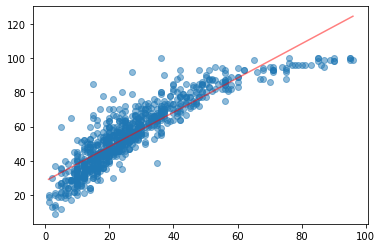

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     3018.
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          1.87e-269
Time:                        22:31:16   Log-Likelihood:                -2805.2
No. Observations:                 777   AIC:                             5614.
Df Residuals:                     775   BIC:                             5624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.1984      0.596     47.281      0.000      27.028      29.369
x1             1.0014      0.018     54.933      0.000       0.966       1.037
==============================================================================
Omnibus:                       45.943   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.462
Skew:                           0.401   Prob(JB):                     2.77e-19
Kurtosis:                       4.413   Cond. No.                         60.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
college_x = sm.add_constant(college_x)
college_model = sm.OLS(college_y,college_x).fit()
college_prediction = college_model.predict(college_x)

col_fig, col_ax = plt.subplots()
col_ax.plot(college_x[:,1],college_prediction,alpha=0.5,color='r')
col_ax.scatter(college_x[:,1],college_y,alpha=0.5)
plt.show()
college_model.summary()

In [8]:
poly_degree = 2
polynomial_features = PolynomialFeatures(poly_degree)
college_x_poly = polynomial_features.fit_transform(college_x)
college_model2 = LinearRegression()

college_model2.fit(college_x_poly,college_y)
college_y_poly_prediction = college_model2.predict(college_x_poly)

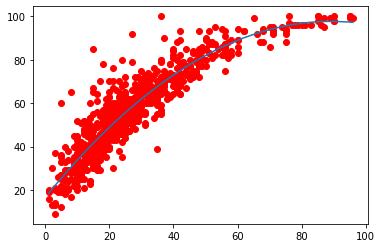

In [9]:
col_fig2, col_ax2 = plt.subplots()

col_ax2.scatter(college_x[:,1],college_y,color='r')
col_ax2.plot(college_x[:,1],college_y_poly_prediction)
plt.show()

In [10]:
sm.OLS(college['Enroll'],sm.add_constant(pd.get_dummies(college['Private'],drop_first=True))).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Enroll   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     368.9
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           1.49e-67
Time:                        22:31:24   Log-Likelihood:                -6261.0
No. Observations:                 777   AIC:                         1.253e+04
Df Residuals:                     775   BIC:                         1.254e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1640.8726     52.560     31.219      0.000    1537.695    1744.050
Yes        -1183.9275     61.637    -19.208      0.000   -1304.924   -1062.931
==============================================================================
Omnibus:                      421.162   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3666.463
Skew:                           2.310   Prob(JB):                         0.00
Kurtosis:                      12.587   Cond. No.                         3.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient describes that the private school did 1183.92 points worse than public institution.

# 3. Auto prediction

Using the `auto.csv` dataset, perform a simple linear regression with `mpg` as the response variable and horsepower as the predictor. Answer the following:

 i. Is there a relationship between the predictor and the response?
 
 ii. How strong is the relationship between the predictor and the response?
 
 iii. Is the relationship between the predictor and the response positive or negative?

 iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals ?

 v. Make a regression plot the response and the predictor.

3.1, 3.2., 3.3. The relationship between the predictor and the response is strong with an r^2 of 0.606. The closer the r^2 is to 1, the stronger the relationship. Based on the graph, there's a negative relationship (it's going downwards)

In [11]:
import pandas as pd
import re
with open('./data/auto.csv','r') as a:
    b = a.read()
    c = re.sub(r'\s{2,}',',',b)
    d = c.replace("horsepower weight","horsepower\tweight")
    e = d.replace("\t",",")

with open('./data/auto1.csv','w') as f:
    f.write(e)
    
auto = pd.read_csv('./data/auto1.csv')
#cleaning data
auto = auto.drop([0])
auto = auto[~auto.horsepower.isin(['?'])]
auto.reset_index(inplace=True,drop=True)
auto['horsepower'] = auto['horsepower'].astype(float)
auto['mpg'] = auto['mpg'].astype(float)
auto = auto.sort_values(by='horsepower')

In [12]:
#singular variable
auto_x = auto['horsepower']
auto_y = auto['mpg']

auto_x = sm.add_constant(auto_x)

auto_model = sm.OLS(auto_y,auto_x).fit()

auto_prediction = auto_model.predict(auto_x)

auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           7.03e-81
Time:                        22:31:27   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   1.319
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
#3.4
hp_98 = auto_model.predict()[98]
print(str(hp_98) + " is the predicted mpg with a horsepower of 98. The 95% confidence interval is ")
print(auto_model.conf_int(0.05))

28.097506019646456 is the predicted mpg with a horsepower of 98. The 95% confidence interval is 
                    0          1
const       38.525212  41.346510
horsepower  -0.170517  -0.145172


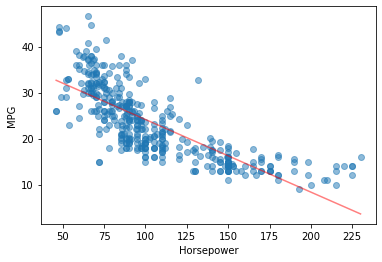

In [14]:
#3.5
auto_fig, auto_ax = plt.subplots()
auto_ax.plot(auto_x.iloc[:,1],auto_prediction,alpha=0.5,color='r')
auto_ax.scatter(auto_x.iloc[:,1],auto_y,alpha=0.5)
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.show()

In [15]:
#parabola

auto['horsepower-SQ'] = auto['horsepower'].apply(np.square)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower-SQ
19,26.0,4.0,97.0,46.0,1835.0,20.5,70.0,2.0,volkswagen 1131 deluxe sedan,2116.0
101,26.0,4.0,97.0,46.0,1950.0,21.0,73.0,2.0,volkswagen super beetle,2116.0
324,43.4,4.0,90.0,48.0,2335.0,23.7,80.0,2.0,vw dasher (diesel),2304.0
323,44.3,4.0,90.0,48.0,2085.0,21.7,80.0,2.0,vw rabbit c (diesel),2304.0
242,43.1,4.0,90.0,48.0,1985.0,21.5,78.0,2.0,volkswagen rabbit custom diesel,2304.0


In [16]:
auto_x1 = auto[['horsepower','horsepower-SQ']]
auto_y1 = auto['mpg']

In [17]:
"""
Exercise 3. Question 1, 2, 3
The relationship between the predictor and the response is strong with an r^2 of 0.688. 
The closer the r^2 is to 1, the stronger the relationship. 
Based on the graph, there's a negative relationship (it's going downwards)
"""

auto_x1 = auto[['horsepower','horsepower-SQ']]
auto_y1 = auto['mpg']

auto_x1 = sm.add_constant(auto_x1)

auto_model1 = sm.OLS(auto_y1,auto_x1).fit()

auto_prediction1 = auto_model1.predict(auto_x1)

In [18]:
#3.4
hp1_98 = auto_model1.predict()[98]
print(str(hp1_98) + " is the predicted mpg with a horsepower of 98. The 95% confidence interval is ")
print(auto_model1.conf_int(0.05))

28.857643022915944 is the predicted mpg with a horsepower of 98. The 95% confidence interval is 
                       0          1
const          53.360315  60.439885
horsepower     -0.527383  -0.404996
horsepower-SQ   0.000991   0.001471


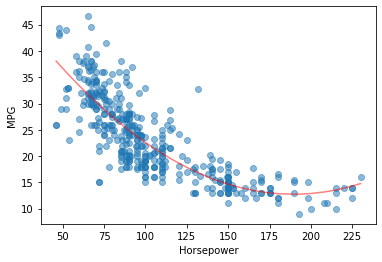

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           5.40e-99
Time:                        22:31:44   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            56.9001      1.800     31.604      0.000      53.360      60.440
horsepower       -0.4662      0.031    -14.978      0.000      -0.527      -0.405
horsepower-SQ     0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
auto_fig1, auto_ax1 = plt.subplots()
auto_ax1.plot(auto_x1.iloc[:,1],auto_prediction1,alpha=0.5,color='r')
auto_ax1.scatter(auto_x1.iloc[:,1],auto_y1,alpha=0.5)
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.show()

auto_model1.summary()

# 4. Auto Multiple Regression

Perform a multiple linear regression with `mpg` as the response and all other variables except name in `auto` as the predictors. Comment on the output:

i. Is there a relationship between the predictors and the response?

ii. Which predictors appear to have a statistically significant relationship to the response?

iii. What does the coefficient for the year variable suggest?

iv. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers?

v. Is there heteroscedasticity in the fit?

In [20]:
auto_x2 = auto.drop(['name','mpg','horsepower-SQ'],axis=1)
auto_y2 = auto['mpg']

auto_x2 = sm.add_constant(auto_x2)
auto_model2 = sm.OLS(auto_y2,auto_x2).fit()
auto_prediction2 = auto_model2.predict(auto_x2)
auto_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          2.04e-139
Time:                        22:31:55   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

4.1. Based on summary, there's a strong relationship btw the predictors and the response(include postive and negative relationship).
4.2. Displacement, weight, year and origin show that they are statistically significant.
4.3. The coefficient suggests for an increase in unit of year, the car mpg increase by 0.75.
4.4. The graph looks catergorical. The cylinders, horsepower, acceleration have a big pvalue. THE AIC and BIC could go lower.

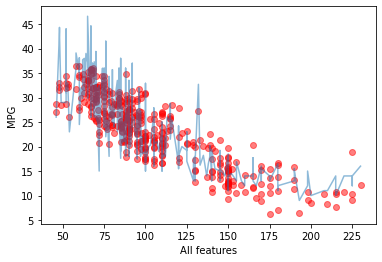

In [21]:
auto_fig2, auto_ax2 = plt.subplots()
auto_ax2.scatter(auto_x2['horsepower'],auto_prediction2,alpha=0.5,color='r')
auto_ax2.plot(auto_x2['horsepower'],auto_y2,alpha=0.5)
plt.xlabel("All features")
plt.ylabel("MPG")
plt.show()

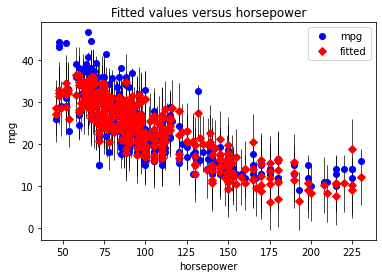

In [22]:
fig = sm.graphics.plot_fit(auto_model2,"horsepower")

In [23]:
import seaborn as sns

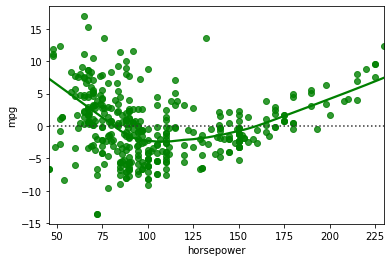

In [24]:
#plt.scatter(auto_prediction2,auto_model2.resid_pearson)
sns.residplot(x=auto_x2['horsepower'], y=auto_y2, lowess=True, color="g")
#print("The variance changing based on the fitted value. The variance is not uniform. There's 2 outliers. There's heteroscedasticity")

# 5. Car Seats

This question should be answered using the Carseats data set

1. Fit a multiple regression model to predict Sales using Price, Urban, and US.

2. Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

3. For which of the predictors can you reject the null hypothesis H0 : βj = 0?

4. On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

5. How well do the models in 1 and 4 fit the data? Explain which statistics show the difference.

6. Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

In [25]:
carseats = pd.read_csv('data/carseats.csv')
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [26]:
carseats['US_dummy'] = pd.get_dummies(carseats['US'],drop_first=True).astype(float)
carseats['Urban_dummy'] = pd.get_dummies(carseats['Urban'],drop_first=True).astype(float)
carseats = carseats.sort_values(by='Price')
carseats_x = carseats[['Price','US_dummy','Urban_dummy']]
carseats_y = carseats['Sales']

In [27]:
carseats_x = sm.add_constant(carseats_x)

carseats_model = sm.OLS(carseats_y,carseats_x).fit()
carseats_prediction = carseats_model.predict(carseats_x)

carseats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           2.39e-23
Time:                        22:32:09   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.0435      0.651     20.036      0.000      11.764      14.323
Price          -0.0545      0.005    -10.389      0.000      -0.065      -0.044
US_dummy        1.2006      0.259      4.635      0.000       0.691       1.710
Urban_dummy    -0.0219      0.272     -0.081      0.936      -0.556       0.512
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

5.2. As price decreases by 1 units, there's an increase of -0.545 unit in sales. The US dummy coefficient is advising how much better/worse they are doing than those who are not located in US. For US dummy, the Americans are doing 1.2006points better than those who live outside US. The Urban dummy coefficient is advising how much better or worse they are doing than those who live in rural area. For Urban dummy, the urban people are doing 0.0219 point worse than rural people.

5.3. Per the summary, we can remove the Urban dummy since the pvalue(0.936) is higher than 0.05.

In [28]:
#5.4
carseats_x1 = carseats[['Price','US_dummy']]

carseats_x1 = sm.add_constant(carseats_x1)

carseats_model1 = sm.OLS(carseats_y,carseats_x1).fit()
carseats_prediction1 = carseats_model1.predict(carseats_x1)

carseats_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           2.66e-24
Time:                        22:32:13   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US_dummy       1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

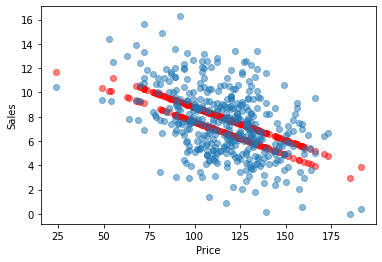

In [29]:
c_fig1, c_ax1 = plt.subplots()
c_ax1.scatter(carseats_x['Price'],carseats_prediction,alpha=0.5,color='r')
c_ax1.scatter(carseats_x['Price'],carseats_y,alpha=0.5)
plt.xlabel("Price")
plt.ylabel("Sales")
plt.show()

In [30]:
#5.5
print(carseats_model1.conf_int(0.05))


                 0          1
const     11.79032  14.271265
Price     -0.06476  -0.044195
US_dummy   0.69152   1.707766
